In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
def generate_fashion_dataset(n_samples=1000):
    """Generate a synthetic fashion preference dataset"""
    np.random.seed(42)

    influencers = ['emma_chamberlain', 'bella_hadid', 'dua_lipa', 'billie_eilish', 'zendaya',
                   'rihanna', 'harry_styles', 'asap_rocky', 'style_blogger', 'none']
    colors = ['black', 'white', 'beige', 'brown', 'pink', 'blue', 'green', 'red', 'yellow', 'purple']
    stores = ['zara', 'hm', 'urban_outfitters', 'forever21', 'shein', 'asos', 'nike', 'adidas', 'thrift_stores']
    styles = ['streetwear', 'athleisure', 'vintage', 'minimal', 'y2k']

    data = []

    for i in range(n_samples):
        age = np.random.randint(16, 26)

        if age < 20:
            style_probs = [0.3, 0.2, 0.1, 0.1, 0.3]
        else:
            style_probs = [0.2, 0.3, 0.2, 0.25, 0.05]

        style = np.random.choice(styles, p=style_probs)

        if style == 'streetwear':
            influencer = np.random.choice(['asap_rocky', 'billie_eilish', 'harry_styles', 'none'],
                                        p=[0.3, 0.2, 0.2, 0.3])
            color = np.random.choice(['black', 'white', 'red', 'green'], p=[0.4, 0.3, 0.2, 0.1])
            budget = np.random.randint(50, 200)
            store = np.random.choice(['urban_outfitters', 'nike', 'adidas', 'shein'], p=[0.3, 0.2, 0.2, 0.3])
        elif style == 'y2k':
            influencer = np.random.choice(['bella_hadid', 'dua_lipa', 'emma_chamberlain', 'none'],
                                        p=[0.3, 0.2, 0.2, 0.3])
            color = np.random.choice(['pink', 'purple', 'blue', 'white'], p=[0.3, 0.2, 0.2, 0.3])
            budget = np.random.randint(30, 150)
            store = np.random.choice(['shein', 'forever21', 'urban_outfitters', 'asos'], p=[0.3, 0.2, 0.2, 0.3])
        elif style == 'minimal':
            influencer = np.random.choice(['zendaya', 'emma_chamberlain', 'style_blogger', 'none'],
                                        p=[0.2, 0.2, 0.3, 0.3])
            color = np.random.choice(['beige', 'white', 'black', 'brown'], p=[0.3, 0.3, 0.2, 0.2])
            budget = np.random.randint(80, 300)
            store = np.random.choice(['zara', 'hm', 'asos', 'urban_outfitters'], p=[0.3, 0.2, 0.2, 0.3])
        elif style == 'athleisure':
            influencer = np.random.choice(['rihanna', 'bella_hadid', 'none'], p=[0.3, 0.2, 0.5])
            color = np.random.choice(['black', 'white', 'blue', 'green'], p=[0.3, 0.3, 0.2, 0.2])
            budget = np.random.randint(60, 250)
            store = np.random.choice(['nike', 'adidas', 'zara', 'hm'], p=[0.3, 0.3, 0.2, 0.2])
        else:
            influencer = np.random.choice(['emma_chamberlain', 'style_blogger', 'none'], p=[0.2, 0.3, 0.5])
            color = np.random.choice(['brown', 'beige', 'red', 'yellow'], p=[0.3, 0.2, 0.2, 0.3])
            budget = np.random.randint(20, 120)
            store = np.random.choice(['thrift_stores', 'urban_outfitters', 'asos'], p=[0.5, 0.3, 0.2])

        shopping_freq = np.random.randint(1, 8)
        instagram_hours = np.random.uniform(1, 8)
        tiktok_hours = np.random.uniform(0.5, 4)

        data.append({
            'age': age,
            'favorite_influencer': influencer,
            'preferred_color': color,
            'shopping_frequency': shopping_freq,
            'instagram_hours': round(instagram_hours, 1),
            'tiktok_hours': round(tiktok_hours, 1),
            'budget_range': budget,
            'preferred_store': store,
            'fashion_style': style
        })

    return pd.DataFrame(data)

df = generate_fashion_dataset(1000)
print(f"Dataset created with {len(df)} samples")
df.head()

Dataset created with 1000 samples


,age,favorite_influencer,preferred_color,shopping_frequency,instagram_hours,tiktok_hours,budget_range,preferred_store,fashion_style
0,22,zendaya,black,3,1.7,2.1,100,zara,minimal
1,20,none,brown,6,2.5,1.1,21,urban_outfitters,vintage
2,20,none,brown,3,3.8,0.7,108,thrift_stores,vintage
3,18,none,white,1,1.5,3.8,110,zara,athleisure
4,17,rihanna,black,7,5.3,3.4,151,adidas,athleisure


In [3]:
print("Dataset Overview:")
print(df.info())
print("\nStyle Distribution:")
print(df['fashion_style'].value_counts())
print("\nBasic Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1000 non-null   int64  
 1   favorite_influencer  1000 non-null   object 
 2   preferred_color      1000 non-null   object 
 3   shopping_frequency   1000 non-null   int64  
 4   instagram_hours      1000 non-null   float64
 5   tiktok_hours         1000 non-null   float64
 6   budget_range         1000 non-null   int64  
 7   preferred_store      1000 non-null   object 
 8   fashion_style        1000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None

Style Distribution:
fashion_style
athleisure    250
streetwear    244
minimal       188
vintage       170
y2k           148
Name: count, dtype: int64

Basic Statistics:
               age  shopping_frequency  instagram_hours  tiktok_hours  \
count  1000.0000

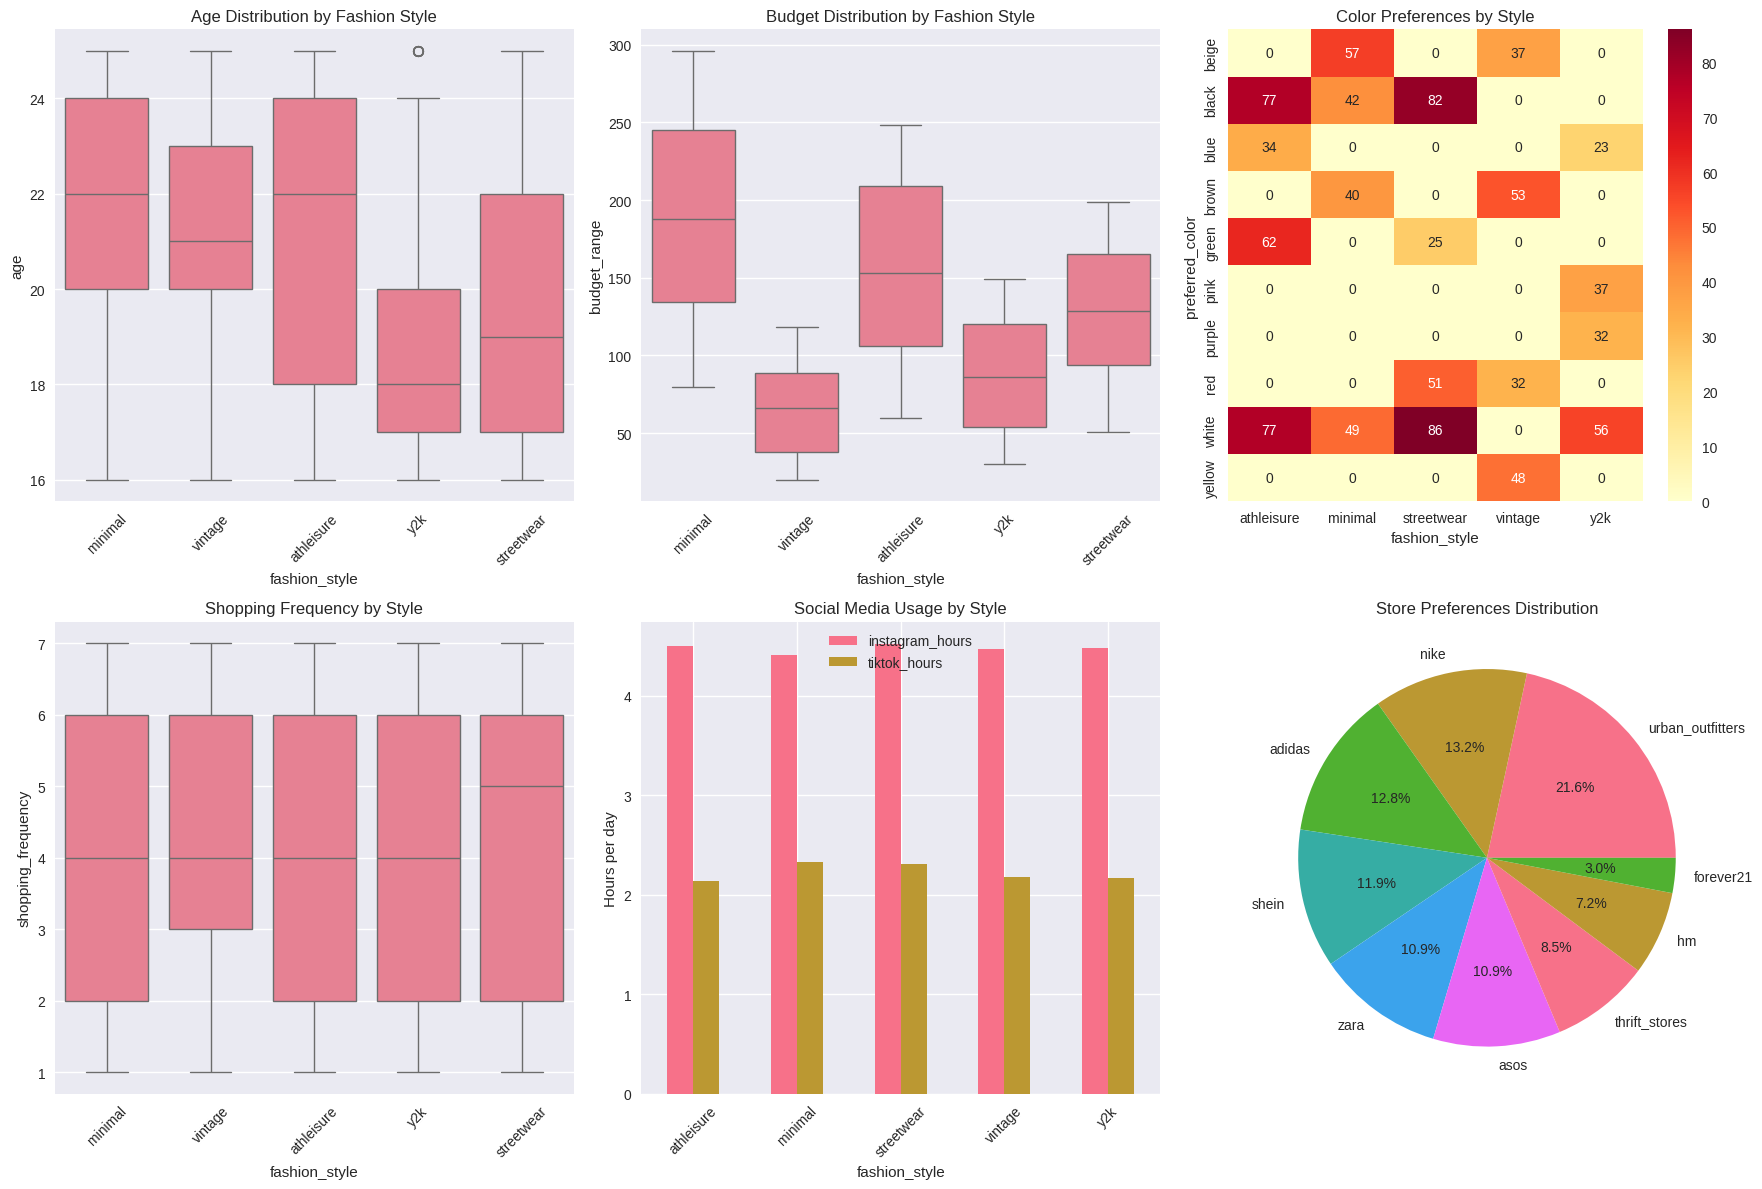

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.boxplot(data=df, x='fashion_style', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Fashion Style')
axes[0,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='fashion_style', y='budget_range', ax=axes[0,1])
axes[0,1].set_title('Budget Distribution by Fashion Style')
axes[0,1].tick_params(axis='x', rotation=45)

color_style_crosstab = pd.crosstab(df['preferred_color'], df['fashion_style'])
sns.heatmap(color_style_crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0,2])
axes[0,2].set_title('Color Preferences by Style')

sns.boxplot(data=df, x='fashion_style', y='shopping_frequency', ax=axes[1,0])
axes[1,0].set_title('Shopping Frequency by Style')
axes[1,0].tick_params(axis='x', rotation=45)

style_social_media = df.groupby('fashion_style')[['instagram_hours', 'tiktok_hours']].mean()
style_social_media.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Social Media Usage by Style')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylabel('Hours per day')

store_counts = df['preferred_store'].value_counts()
axes[1,2].pie(store_counts.values, labels=store_counts.index, autopct='%1.1f%%')
axes[1,2].set_title('Store Preferences Distribution')
plt.tight_layout()
plt.show()

In [5]:
X = df.drop('fashion_style', axis=1)
y = df['fashion_style']

label_encoders = {}
categorical_columns = ['favorite_influencer', 'preferred_color', 'preferred_store']

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("Encoded categorical variables:")
for col in categorical_columns:
    print(f"{col}: {len(label_encoders[col].classes_)} categories")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
numerical_columns = ['age', 'shopping_frequency', 'instagram_hours', 'tiktok_hours', 'budget_range']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")



Encoded categorical variables:
favorite_influencer: 10 categories
preferred_color: 10 categories
preferred_store: 9 categories
Training set size: (800, 8)
Test set size: (200, 8)


In [6]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    print(f"\n--- {name} ---")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred,
        'model': model
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")




--- Random Forest ---
Accuracy: 0.8850
F1-Score: 0.8839

--- Logistic Regression ---
Accuracy: 0.5550
F1-Score: 0.5541

--- K-Nearest Neighbors ---
Accuracy: 0.6700
F1-Score: 0.6752


Model Comparison:
                 Model  Accuracy  F1-Score
0        Random Forest     0.885  0.883922
1  Logistic Regression     0.555  0.554122
2  K-Nearest Neighbors     0.670  0.675235


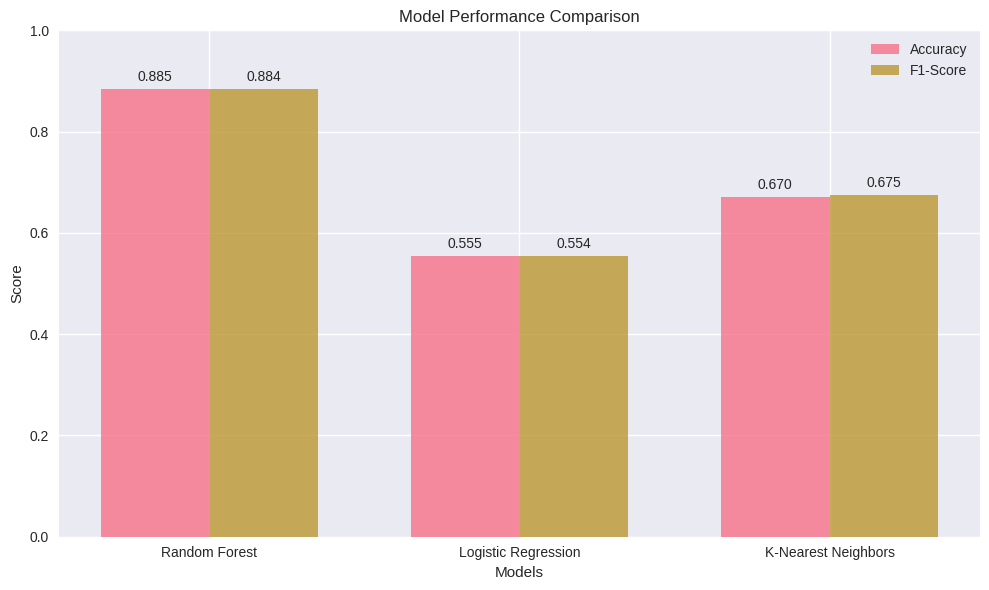

In [7]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()]
})

print("Model Comparison:")
print(comparison_df)

plt.figure(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, comparison_df['F1-Score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.ylim(0, 1)

for i, (acc, f1) in enumerate(zip(comparison_df['Accuracy'], comparison_df['F1-Score'])):
    plt.text(i - width/2, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, f1 + 0.01, f'{f1:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




Best Model: Random Forest
Best Accuracy: 0.8850


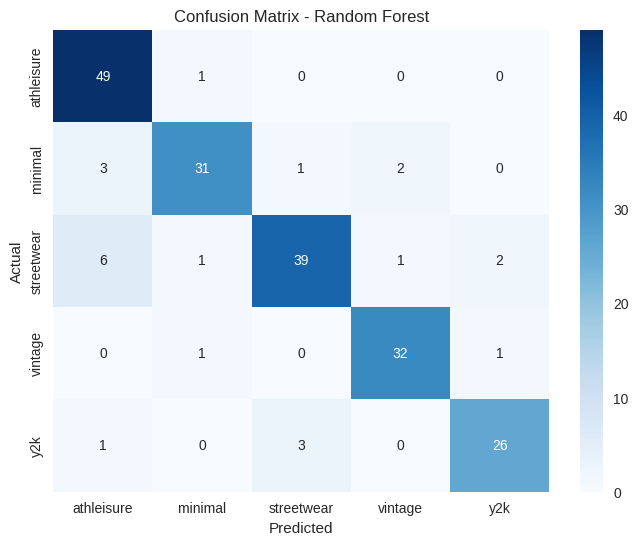


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

  athleisure       0.83      0.98      0.90        50
     minimal       0.91      0.84      0.87        37
  streetwear       0.91      0.80      0.85        49
     vintage       0.91      0.94      0.93        34
         y2k       0.90      0.87      0.88        30

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.89      0.89      0.88       200



In [8]:
# Cell 8: Best Model Analysis
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, results[best_model_name]['predictions']))


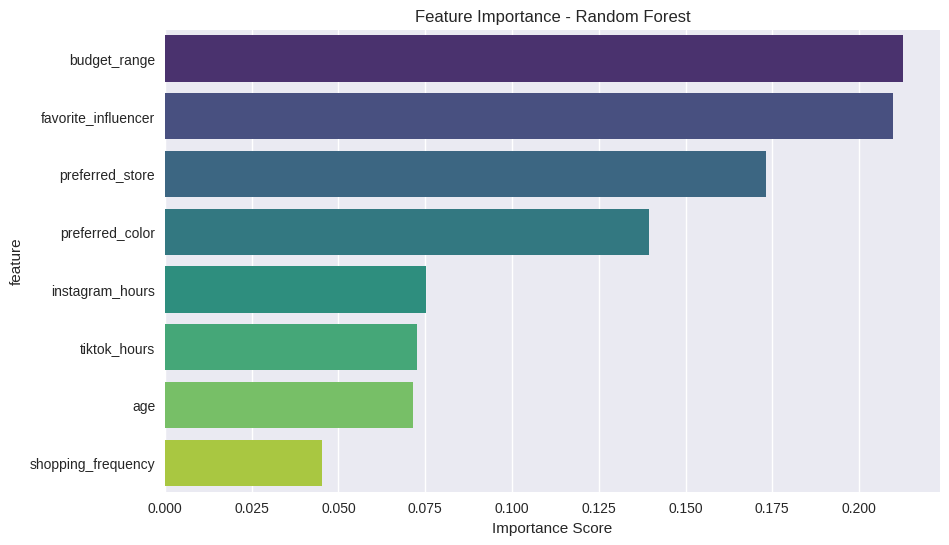

Feature Importance Ranking:
               feature  importance
6         budget_range    0.212660
1  favorite_influencer    0.209834
7      preferred_store    0.173084
2      preferred_color    0.139579
4      instagram_hours    0.075343
5         tiktok_hours    0.072758
0                  age    0.071469
3   shopping_frequency    0.045274


In [9]:
# Cell 9: Feature Importance (Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance Score')
    plt.show()

    print("Feature Importance Ranking:")
    print(feature_importance)



In [10]:
print("\n=== Sample Predictions ===")

sample_users = [
    {
        'age': 19,
        'favorite_influencer': 'emma_chamberlain',
        'preferred_color': 'pink',
        'shopping_frequency': 4,
        'instagram_hours': 3.5,
        'tiktok_hours': 2.1,
        'budget_range': 80,
        'preferred_store': 'urban_outfitters'
    },
    {
        'age': 23,
        'favorite_influencer': 'zendaya',
        'preferred_color': 'beige',
        'shopping_frequency': 2,
        'instagram_hours': 2.0,
        'tiktok_hours': 1.0,
        'budget_range': 150,
        'preferred_store': 'zara'
    },
    {
        'age': 20,
        'favorite_influencer': 'asap_rocky',
        'preferred_color': 'black',
        'shopping_frequency': 3,
        'instagram_hours': 4.0,
        'tiktok_hours': 2.5,
        'budget_range': 120,
        'preferred_store': 'nike'
    }
]

for i, user in enumerate(sample_users, 1):

    user_df = pd.DataFrame([user])

    for col in categorical_columns:
        user_df[col] = label_encoders[col].transform(user_df[col])

    user_scaled = user_df.copy()
    user_scaled[numerical_columns] = scaler.transform(user_df[numerical_columns])


    prediction = best_model.predict(user_scaled)[0]
    prediction_proba = best_model.predict_proba(user_scaled)[0]

    print(f"\nSample User {i}:")
    print(f"Profile: Age {user['age']}, {user['favorite_influencer']}, {user['preferred_color']}, "
          f"Budget ${user['budget_range']}, {user['preferred_store']}")
    print(f"Predicted Style: {prediction}")
    print(f"Confidence: {max(prediction_proba):.2f}")


    proba_dict = dict(zip(best_model.classes_, prediction_proba))
    top_3 = sorted(proba_dict.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"Top 3 predictions: {top_3}")


print("\n=== Key Insights about Gen Z Fashion Trends ===")
insights = [
    "1. Age significantly influences fashion preferences - younger Gen Z (16-19) prefer Y2K and streetwear",
    "2. Budget range is a strong predictor, with higher budgets correlating with minimal/athleisure styles",
    "3. Social media usage patterns show distinct differences across fashion styles",
    "4. Store preferences cluster strongly by fashion style (e.g., thrift stores → vintage)",
    "5. Color preferences show clear patterns (black/white for streetwear, pink/purple for Y2K)",
    "6. Influencer preferences align with fashion styles (Emma Chamberlain → Y2K/vintage)",
    "7. Shopping frequency varies by style, with Y2K fans shopping more frequently"
]

for insight in insights:
    print(insight)

print(f"\n=== Final Model Performance ===")
print(f"Best Model: {best_model_name}")
print(f"Final Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Final F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"Sample Size: {len(df)}")
print(f"Features Used: {len(X.columns)}")

print("\n=== Business Applications ===")
applications = [
    "• Fashion retailers can use this for personalized product recommendations",
    "• Marketing teams can create targeted campaigns based on predicted preferences",
    "• Brands can identify which influencers align with their target customer base",
    "• Inventory management can be optimized based on trend predictions",
    "• Fashion apps can improve user onboarding and personalization"
]

for app in applications:
    print(app)


=== Sample Predictions ===

Sample User 1:
Profile: Age 19, emma_chamberlain, pink, Budget $80, urban_outfitters
Predicted Style: y2k
Confidence: 0.50
Top 3 predictions: [(np.str_('y2k'), np.float64(0.5)), (np.str_('vintage'), np.float64(0.3)), (np.str_('streetwear'), np.float64(0.17))]

Sample User 2:
Profile: Age 23, zendaya, beige, Budget $150, zara
Predicted Style: minimal
Confidence: 0.94
Top 3 predictions: [(np.str_('minimal'), np.float64(0.94)), (np.str_('athleisure'), np.float64(0.03)), (np.str_('vintage'), np.float64(0.03))]

Sample User 3:
Profile: Age 20, asap_rocky, black, Budget $120, nike
Predicted Style: streetwear
Confidence: 0.69
Top 3 predictions: [(np.str_('streetwear'), np.float64(0.69)), (np.str_('athleisure'), np.float64(0.26)), (np.str_('y2k'), np.float64(0.03))]

=== Key Insights about Gen Z Fashion Trends ===
1. Age significantly influences fashion preferences - younger Gen Z (16-19) prefer Y2K and streetwear
2. Budget range is a strong predictor, with higher 